In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import geeksw.hgcal.testbeam as hgc

In [9]:
muon_runlist = hgc.runlist.query("Particle == 'muon'").groupby("Energy").apply(lambda x : x.iloc[0])
muon_runlist

,Run,Date,Nevents,Particle,Energy,Configuration,CaloConfiguration
Energy,,,,,,,
-1,524,2018-10-14 20:10:00,4238,muon,-1,22b,1
200,698,2018-10-17 00:03:00,10147,muon,200,22b,1


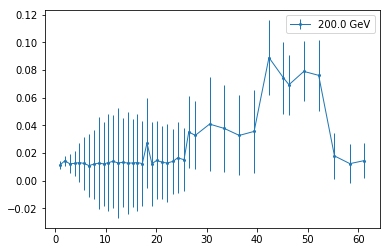

In [10]:
run_numbers = muon_runlist.Run.values
#mean_rechit_sum = []
#mean_rechit_X0 = []
#i = 0
#for run in run_numbers:
hdf = hgc.load_run(698, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
energy = hdf.beamEnergy.values[0]
energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
energy_sums = energy_sums.reset_index()
energy_sums_mean = energy_sums.groupby("rechit_X0").median()
energy_sums_variance = energy_sums.groupby("rechit_X0").std()
energy_sums_variance = energy_sums_variance.reset_index()
energy_sums_mean = energy_sums_mean.reset_index()
energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sums_mean["rechit_energy"].sum()
energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sums_variance["rechit_energy"].sum()
    #energy_sums_mean
    #energy_sums_variance
plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.show()

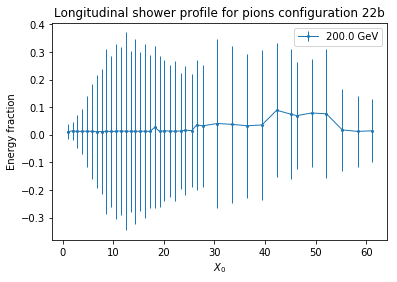

In [11]:
run_numbers = muon_runlist.Run.values
#mean_rechit_sum = []
#mean_rechit_X0 = []
#i = 0
#for run in run_numbers:
hdf = hgc.load_run(698, columns = ["beamEnergy","event", "rechit_layer", "rechit_energy", "rechit_X0", "rechit_dE"])
energy = hdf.beamEnergy.values[0]
energy_sums = hdf.groupby(["rechit_X0","event"]).rechit_energy.sum()
energy_sums = energy_sums.reset_index()
energy_sums_mean = energy_sums.groupby("rechit_X0").median()
energy_sums_variance = energy_sums.groupby("rechit_X0").std()
energy_sums_variance = energy_sums_variance.reset_index()
energy_sums_mean = energy_sums_mean.reset_index()
energy_sum_temporary = energy_sums_mean["rechit_energy"].sum()
energy_sums_mean["rechit_energy"] = energy_sums_mean["rechit_energy"]/energy_sum_temporary
energy_sums_variance["rechit_energy"] = energy_sums_variance["rechit_energy"]/energy_sum_temporary
    #energy_sums_mean
    #energy_sums_variance
plt.errorbar(energy_sums_mean.rechit_X0, energy_sums_mean.rechit_energy, yerr=energy_sums_variance.rechit_energy, fmt="o", linestyle='-', linewidth=1, markersize=2, label=str(energy) + " GeV")
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for muons configuration 22b")
plt.show()